<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/3qubit%EC%96%91%EC%9E%90%EB%82%9C%EC%88%98%EB%B0%9C%EC%83%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB

3Qubit으로 양자 난수 발생

In [2]:
# Qiskit 모듈 불러오기
from qiskit import QuantumCircuit, Aer, execute

# 3 큐비트 양자 회로 생성
qc = QuantumCircuit(3, 3)

# 큐비트 0, 1 및 2를 슈미트 (Hadamard) 게이트로 초기화
qc.h(qubit=0)
qc.h(qubit=1)
qc.h(qubit=2)

# 결과 측정
qc.measure([0,1,2], [0,1,2])

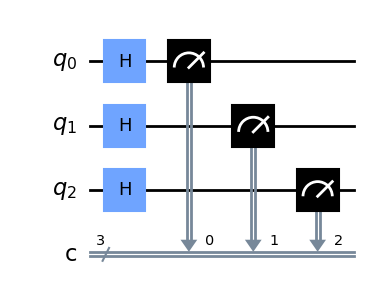

In [3]:
# 양자회로 구조 보기
qc.draw('mpl')

In [12]:
# 양자 회로를 시뮬레이터에서 실행하여 결과 받기
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)

# 결과 출력
result = job.result()
counts = result.get_counts()
print(counts)

{'101': 123, '001': 113, '110': 135, '000': 139, '010': 119, '100': 131, '111': 141, '011': 123}


각 확률을 1024샷에 3Qubit 으로 나누고,<BR>
각각의 확률값을 2진 비트로 전환

In [13]:
bits = " "
for v in counts.values():
    if v > 1024/(2**3):
        bits += '1'
    else:
        bits += '0'
    ###if
###
print(bits)

 00110110


In [14]:
#매번 전체를 수행할 때마다 결과가 다르게 나와야 합니다.
decimal_string = str(int(bits, 2))
print(decimal_string)

54


야호: 양자회로를 이용한 Hello Quantum Program 완성<BR>
by 박문기